# Coursera IBM Data Science: Data Visualization with Python
## Final Project

*The final project of the 'Data Visualization with Python' course consists of 2 different topics and datasets. The first dataset cotains data that has been gathered from a survey about data science topics. You are supposed to create a bar chart. In the second section, you are supposed to create a choropleth map with San Francisco crime data. We start the project by importing the required packages.*

In [1]:
#import packages 
import pandas as pd
import csv

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import folium


print("Required Packages imported.")

Required Packages imported.


## Part 1: Data Science Topics
### Create a Bar Chart

Data has been gathered from a survey that was conducted to gauge the audience interest in data science topics, including:<br>
- Big Data (Spark / Hadoop); <br>
- Data Analysis / Statistics;<br>
- Data Journalism;<br>
- Data Visualization;<br>
- Deep Learning;<br>
- Machine Learning.<br>

In this study, the participants had 3 options to rate the topics: very interested, somewhat interested, or not interested. <br>
The survey has been completed by 2233 respondents.

### Question 1: Import the Dataset and Create a Data Frame

In [2]:
#import the data from the csv file
path ='.../.../Topic_Survey_Assignment (1).csv'
df = pd.read_csv(path, index_col=0)

In [3]:
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


### Question 2: Create the Bar Chart

In [4]:
#sort values in descending order
df = df.sort_values(['Very interested'],ascending=False)

In [5]:
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [6]:
#convert the values to percentage values
df['Very interested'] = round((df['Very interested']/2233)*100,2)
df['Somewhat interested'] = round((df['Somewhat interested']/2233)*100,2)
df['Not interested'] = round((df['Not interested']/2233)*100,2)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


<Figure size 432x288 with 0 Axes>

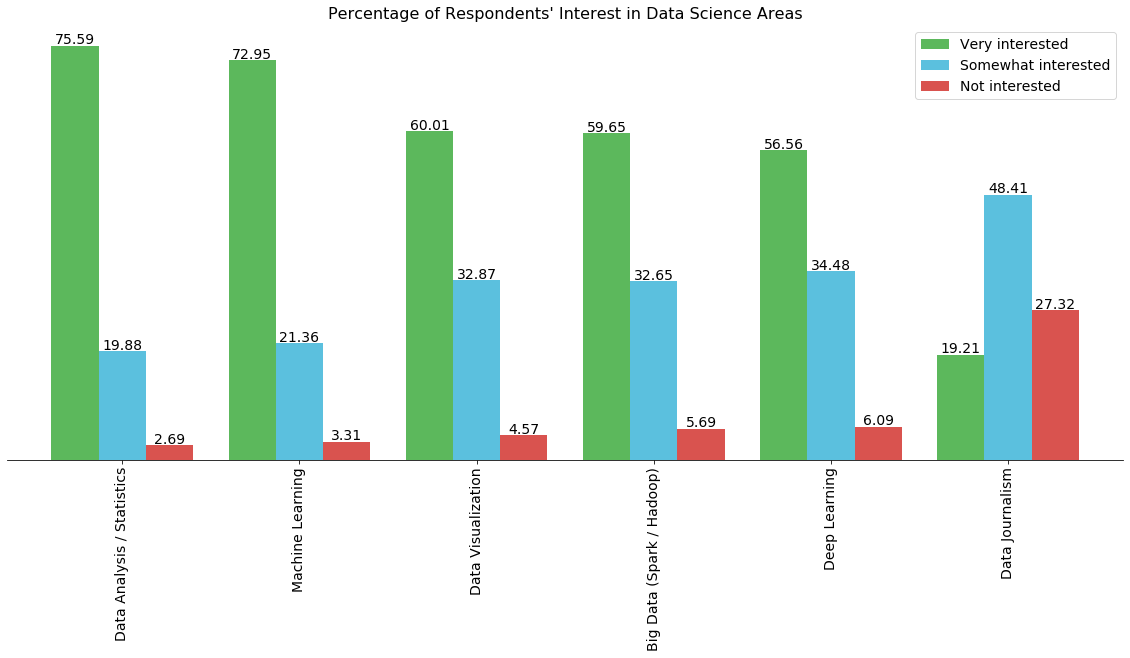

In [7]:
#replicate the chart as given in the assignment

#values for x labels
labels_x = ['Data Analysis / Statistics','Machine Learning','Data Visualization','Big Data (Spark / Hadoop)','Deep Learning','Data Journalism']
#create a list of colors
legend_colors = ['#5cb85c', '#5bc0de', '#d9534f']

#make the plot
fig = plt.figure()

ax = df.plot(kind='bar', 
             figsize=(20,8), 
             width=0.8, 
             color=legend_colors)

ax.set_xticklabels(labels_x,fontsize=14)       #mention bars by name and set font size to 14
ax.axes.yaxis.set_visible(False)               #remove the percentage numbers from the y-axis
ax.legend(fontsize=14)                         #set font size of the legend to 14
ax.set_title("Percentage of Respondents' Interest in Data Science Areas",fontsize=16)  #include the figure title and set font size to 16
ax.spines['left'].set_visible(False)         #make edges invisible
ax.spines['top'].set_visible(False)          #make edges invisible
ax.spines['right'].set_visible(False)        #make edges invisible

#add the percentages on top of the bars
for z in ax.patches:
    height = z.get_height()
    ax.annotate(np.round(z.get_height(),decimals=2),xy=(z.get_x() + z.get_width() / 2, height + 1),ha='center',va='center',fontsize=14)

## Part 2: San Francisco Crime Data

### Create a Choropleth Map with Folium

In this section, we are going to create a choropleth map with Folium. The choropleth map visualizes the crime rate in San Francisco. San Francisco has 10 main neighborhoods, namely: <br>
1. Central; <br>
2. Southern; <br>
3. Bayview; <br>
4. Mission; <br>
5. Park; <br>
6. Richmond;<br>
7. Ingleside; <br>
8. Taraval; <br>
9. Northern; <br>
10. Tenderloin.<br>

Let's restructure the data to create the choropleth map.

### Question 3: Import the Data and Create a Data Frame as shown in the Assignment

In [8]:
#import the dataset
path2 = '..../.../Police_Department_Incidents_-_Previous_Year__2016_.csv'
df2 = pd.read_csv(path2)

In [9]:
df2.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [10]:
count_district = df2.PdDistrict.value_counts()    #counts all entries per district

In [11]:
#reset rows like in the example
count_district = count_district.reindex(index=['CENTRAL','NORTHERN','PARK','SOUTHERN','MISSION','TENDERLOIN','RICHMOND','TARAVAL','INGLESIDE','BAYVIEW'])
count_district

CENTRAL       17666
NORTHERN      20100
PARK           8699
SOUTHERN      28445
MISSION       19503
TENDERLOIN     9942
RICHMOND       8922
TARAVAL       11325
INGLESIDE     11594
BAYVIEW       14303
Name: PdDistrict, dtype: int64

In [12]:
df_sf = count_district.to_frame()            #convert it to frame
df_sf.reset_index(inplace=True)    #the district name will be the index and should become a column

In [13]:
df_sf

,index,PdDistrict
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [14]:
#rename the columns
df_sf.rename(columns={'index':'Neighborhood','PdDistrict':'Count'}, inplace=True)

In [15]:
df_sf

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


### Question 4: Create a Choropleth Map

As learned in the choropleth maps lab, we need a GeoJSON file that marks the boundries of each neighborhood in San Francisco. The file has been provided in the assignment. Let's create a map with a zoom level of 12 first. After, let's fill the map with data and replicate the map as in the assingment.

In [16]:
#import the geo file
geo_sf = r'...../Downloads/san-francisco.geojson'

In [17]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [18]:
# create map and display it
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sf_map

In [19]:
#Now, generate the choropleth map


#create map
sf_map.choropleth(
    geo_data=geo_sf,
    data=df_sf,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sf_map

**This is the end of the assignment.**